In [27]:
import pandas as pd

# Function to read GCT File into a dataframe and provide a summary of the number of columns and rows

def read_gct_file(file_path, summary=False):
    # Read GCT File into a dataframe 
    df = pd.read_csv(file_path, skiprows=2, sep='\t', index_col=[0,1])
    
    #Print summary if summary is set to true
    if summary:
        num_rows, num_columns = df.shape
        print(f"Number of columns: {num_columns}")
        print(f"Number of rows: {num_rows}")
        #Can use below line to display for debug
        #display(df)
        
    return df

#Reading the BRCA_minimal_60x19.gct file
df_min = read_gct_file("/home/jovyan/BRCA_minimal_60x19.gct", summary=True)

#Reading the BRCA_large_20783x40.gct file
df_large = read_gct_file("/home/jovyan/BRCA_large_20783x40.gct")
    

Number of columns: 19
Number of rows: 60


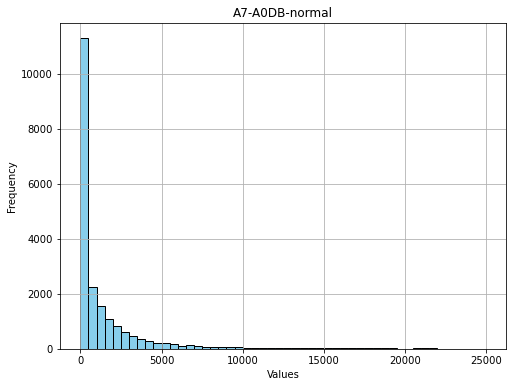

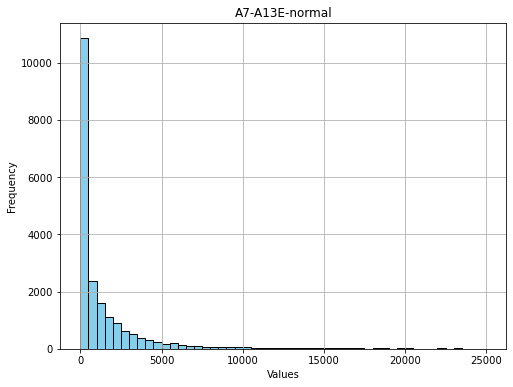

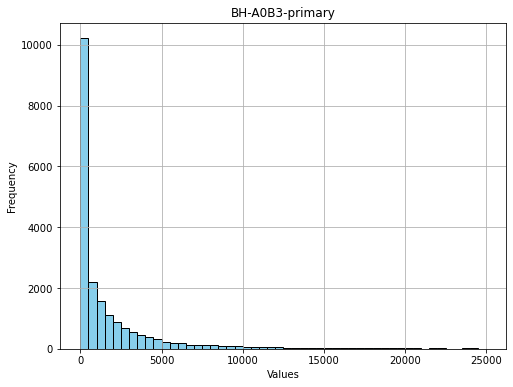

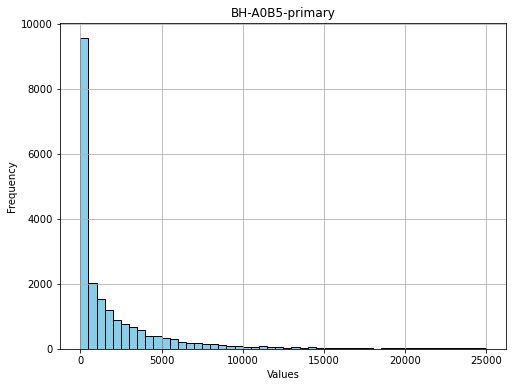

In [28]:
# Histograms of samples "A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary" in BRCA_large_20783x40.gct dataframe
#using matplotlib to plot histograms
import matplotlib.pyplot as plt

#list of sample names whose histograms we want to plot
samples = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]

#iterate through the list "samples" and make a histogram for each sample
for sample_name in samples:
    plt.figure(figsize=(8, 6))
    #Choose a range and bin # that makes sense for the dataset and allows the data to be visible
    plt.hist(df_large[sample_name], bins=50, range=[0, 25000], color='skyblue', edgecolor='black')
    plt.title(f'{sample_name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [29]:
# Create sample_statistics dataframe with sample name, mean, median, and mode for each sample
sample_statistics = pd.DataFrame({
    'Mean' : df_large.mean(),
    'Median' : df_large.median(),
    'Standard deviation' : df_large.std()
})

print(sample_statistics)

                        Mean  Median  Standard deviation
A7-A0CE-normal   3308.877255   814.0        12725.531516
A7-A0CH-normal   3046.316942   630.0        14145.451194
A7-A0D9-normal   2628.131550   350.0        17827.391513
A7-A0DB-normal   2354.674445   362.0        13973.914409
A7-A13E-normal   2380.702593   427.0        13373.496798
A7-A13F-normal   2493.380215   527.0        12477.592390
A7-A13G-normal   3509.542463   454.0        30474.663592
AC-A23H-normal   3396.675312   659.0        20073.855034
AC-A2FB-normal   3675.583169   792.0        15577.976864
AC-A2FF-normal   3743.660492   935.0        14827.012985
AC-A2FM-normal   2714.893663   578.0        11431.472640
BH-A0AU-normal   2436.466679   641.0         8961.357233
BH-A0AY-normal   2412.727951   567.0         9362.391989
BH-A0AZ-normal   3216.765337   836.0        10744.505522
BH-A0B3-normal   2879.876149   772.0         9737.708560
BH-A0B5-normal   3129.721455   358.0        26253.260752
BH-A0B7-normal   2337.598326   

In [31]:
# Filter out rows with maximum value less than 500
# Use df.max() function on row axis to filter for values greater than or equal to 500
filtered_df_large = df_large[df_large.max(axis=1) >= 500]

# Print the filtered DataFrame to visualize if needed
# print(filtered_df_large)

In [19]:
#Finding mean, median, and mode of filtered dataframe (rows with max value less than 500) using similar dataframe functions
sample_statistics_filtered = pd.DataFrame({
    'Mean' : filtered_df_large.mean(),
    'Median' : filtered_df_large.median(),
    'Standard deviation' : filtered_df_large.std()
})

print(sample_statistics_filtered)

                        Mean  Median  Standard deviation
A7-A0CE-normal   4428.964196  1686.0        14595.350088
A7-A0CH-normal   4080.481127  1353.0        16281.523504
A7-A0D9-normal   3521.820589   869.0        20604.705170
A7-A0DB-normal   3154.413532   873.0        16132.938035
A7-A13E-normal   3189.282939   964.0        15431.177876
A7-A13F-normal   3338.259760  1117.0        14377.839339
A7-A13G-normal   4703.196374  1112.0        35272.504044
AC-A23H-normal   4549.525089  1393.0        23174.564495
AC-A2FB-normal   4924.490774  1699.0        17901.819285
AC-A2FF-normal   5012.185238  1922.0        17016.384613
AC-A2FM-normal   3633.474976  1253.0        13136.160945
BH-A0AU-normal   3256.446747  1328.0        10268.540480
BH-A0AY-normal   3229.524830  1200.0        10740.220292
BH-A0AZ-normal   4302.163937  1738.0        12278.296235
BH-A0B3-normal   3851.818064  1587.0        11131.811252
BH-A0B5-normal   4196.457948   941.0        30381.342321
BH-A0B7-normal   3125.701133  1

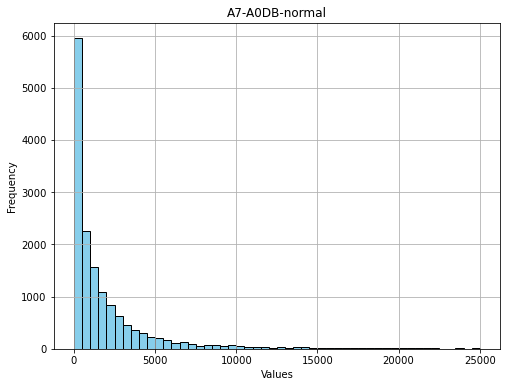

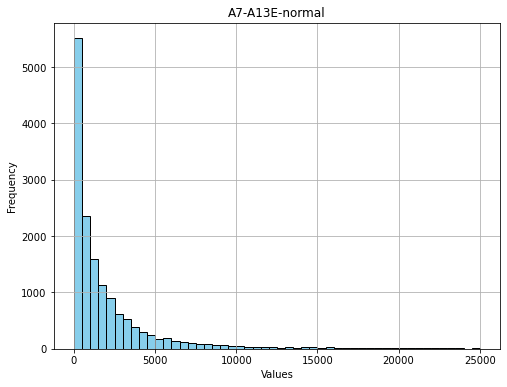

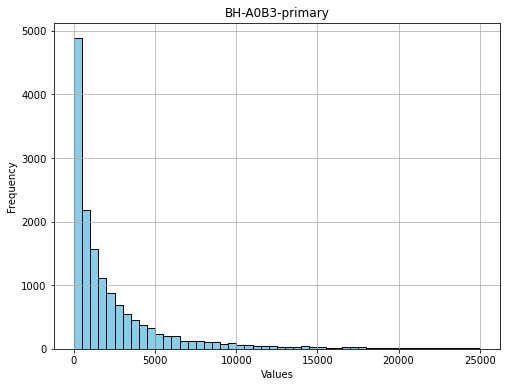

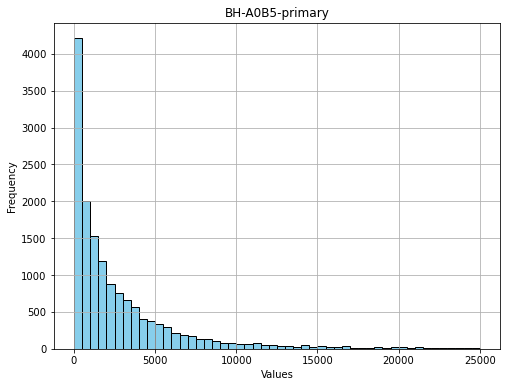

In [32]:
#Histograms of samples "A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary" in filtered dataframe
import matplotlib.pyplot as plt

#list of sample names whose histograms we want to plot
samples = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]

#iterate through the list "samples" and make a histogram for each sample
for sample_name in samples:
    plt.figure(figsize=(8, 6))
    # Again, choose bin # and range that best visualizes the data
    plt.hist(filtered_df_large[sample_name], bins=50, range=[0, 25000], color='skyblue', edgecolor='black')
    plt.title(f'{sample_name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()